In [3]:
%run symplectic_euler.ipynb
%run hamiltonian.ipynb
%run Lotka-Volterra_odeint.ipynb
%run henon_heiles_symplectic_euler.ipynb
%run henon_heils_hamiltonian.ipynb

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2890
Epoch 2/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.9603
Epoch 3/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.7202
Epoch 4/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.5672
Epoch 5/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.4903
Epoch 6/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.4717
Epoch 7/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.4882
Epoch 8/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.5130
Epoch 9/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.5261
Epoch 10/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.5211
Epoch 11/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.5013
Epoch 12/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4750
Epoch 13/2000
1/1 [====================

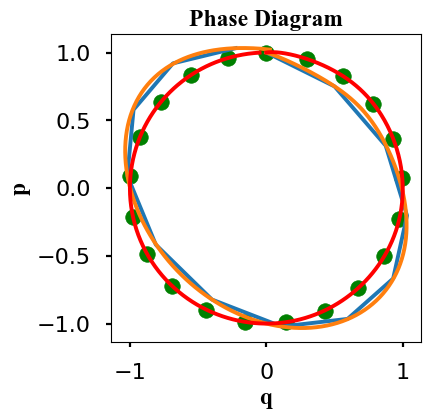

In [67]:
# --------------------------------------------------Harmonic Oscillator Example----------------------------------------------------

def T(p):
    return (p**2)/2

def V(q):
    return (q**2)/2

ho_model = Hamiltonian(solver=symplectic_euler(T, V, initial_point=[0.,1.], t_interval=[0,2*np.pi], h=0.5), input_dim=1, output_dim=2,
            hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2000 ,batch_size=100000000, learning_rate=0.0002, h_for_t_created=0.001)


plt.figure(figsize = (4, 4))
plt.xlabel('q', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('p', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

test_t = np.arange(0,2*np.pi,0.01)
prediction_energy = ho_model.energy_model_train(test_t)
prediction_mse = ho_model.model_train(test_t)

# grand-truth
plt.scatter(tf.math.sin(np.arange(0.,2*np.pi,0.3)), tf.math.cos(np.arange(0.,2*np.pi,0.3)), c="green")
# symplectic euler
plt.plot(ho_model.z[:,0], ho_model.z[:,1])
# NN with mse
plt.plot(prediction_mse[:,0], prediction_mse[:,1])
# NN with energy loss
plt.plot(prediction_energy[:,0], prediction_energy[:,1], c="red")

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5045
Epoch 2/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.3508
Epoch 3/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.2666
Epoch 4/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2277
Epoch 5/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.2154
Epoch 6/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.2146
Epoch 7/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.2136
Epoch 8/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.2079
Epoch 9/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1990
Epoch 10/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1904
Epoch 11/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1849
Epoch 12/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1833
Epoch 13/1000
1/1 [====================

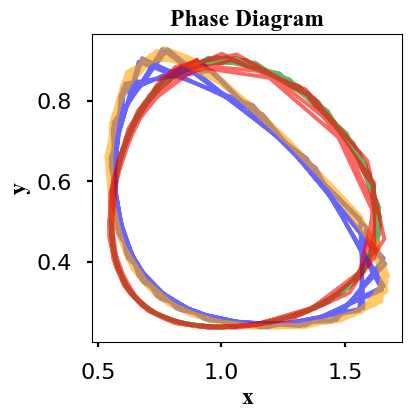

In [68]:
# --------------------------------------------------Lotka-Volterra Example----------------------------------------------------

# α = 2/3, β = 4/3, γ = 1 = δ. Assume x, y quantify thousands each. Circles represent prey and predator initial conditions from x = y = 0.9 to 1.8, in steps of 0.1. The fixed point is at (1, 1/2).
# q = ln(y), p = ln(x) 

def T(p):
  return tf.math.exp(p) - p

def V(q):
  return (4/3) * tf.math.exp(q) - (2/3) * q

lv_model = Hamiltonian(solver=symplectic_euler(T, V, initial_point=[-0.105, -0.105], t_interval=[0, 50], h=1), input_dim=1, output_dim=2,
            hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=1000 ,batch_size=100000000, learning_rate=0.0002, h_for_t_created=0.5)


plt.figure(figsize = (4, 4))
plt.xlabel('x', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('y', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

test_t = np.arange(0, 50, 0.5)
prediction_energy = lv_model.energy_model_train(test_t)
prediction_mse = lv_model.model_train(test_t)

# grand-truth
x, y = lotka_volterra(alpha=2/3, beta=4/3, delta=1., gamma=1., x0=0.9, y0=0.9, t_interval=[0,50], h=0.5)
plt.plot(x, y, c ="green", alpha=0.6)
# symplectic euler
plt.plot(np.exp(lv_model.z[:,1]), np.exp(lv_model.z[:,0]), c ="blue", alpha=0.6)
# NN with mse
plt.plot(np.exp(prediction_mse[:,1]), np.exp(prediction_mse[:,0]), c ="orange", alpha=0.6)
# NN with energy loss
plt.plot(np.exp(prediction_energy[:,1]), np.exp(prediction_energy[:,0]), c="red", alpha=0.6)

In [5]:
def T(px, py):
  return 0.5*(px**2 + py**2)

def V(x, y):
  return 0.5*(x**2 + y**2) + ((x**2)*y - (y**3)/3)

hh_model = hh_Hamiltonian(solver=henon_heiles_symplectic_euler(T, V, initial_point=[0.3, -0.3, 0.3, 0.15], t_interval=[0., 6*np.math.pi], h=6*np.math.pi/501), 
                          input_dim=1, output_dim=4, hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2 ,batch_size=100000000,
                          learning_rate=0.0002, h_for_t_created=0.5)

Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 0.1994
Epoch 2/2
1/1 [==============================] - 0s 22ms/step - loss: 0.1121
Epoch 1/2


TypeError: in user code:

    File "c:\Users\tayfununal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\tayfununal\AppData\Local\Temp\ipykernel_9632\3003290955.py", line 61, in custom_loss  *
        self.H(self.T, self.V, y_pred[None,:,0], y_pred[None, :,1])) +  0.001 * tf.keras.losses.MSE(y_true,y_pred)
    File "C:\Users\tayfununal\AppData\Local\Temp\ipykernel_9632\3003290955.py", line 30, in H  *
        return T(px, py) + V(x, y)

    TypeError: outer_factory.<locals>.inner_factory.<locals>.tf__T() takes 1 positional argument but 2 were given
